In [1]:
import numpy as np
from scipy.signal import convolve2d
import skimage.io as io
import pandas as pd

In [2]:
img = io.imread('../test_images/img7.jpg', as_gray=True)
WIN_SIZE: int = 11
ALPHA: float = 1 / WIN_SIZE
CONV_MODE:str = 'valid'
WIN_RADIUS: int = (WIN_SIZE - 1) // 2 
Q_LEVELS: int = 8
FUND_ANGLE: float = (2 * np.pi) / Q_LEVELS
VOTE_ALPHA: int = 2

In [3]:
x = np.arange(-WIN_RADIUS,WIN_RADIUS+1)[np.newaxis]
w0 = np.ones_like(x)
w1 = np.exp(-2*np.pi*x*ALPHA*1j)
w2 = np.conj(w1)
print(w0.shape)

(1, 11)


#### Calculate the filters responses and local phases

In [31]:
filterResp1: np.ndarray = convolve2d(convolve2d(img, w0.T, CONV_MODE),w1,CONV_MODE) # (0, a)
filterResp2: np.ndarray = convolve2d(convolve2d(img, w1.T, CONV_MODE),w0,CONV_MODE) # (a, 0)
filterResp3: np.ndarray = convolve2d(convolve2d(img, w1.T, CONV_MODE),w1,CONV_MODE) # (a, a)
filterResp4: np.ndarray = convolve2d(convolve2d(img, w1.T, CONV_MODE),w2,CONV_MODE) # (a, -a)

# Local Phases of the Responses
theta1 = np.arctan2(filterResp1.imag, filterResp1.real)
theta2 = np.arctan2(filterResp2.imag, filterResp2.real)
theta3 = np.arctan2(filterResp3.imag, filterResp3.real)
theta4 = np.arctan2(filterResp4.imag, filterResp4.real)

In [51]:
angles = [FUND_ANGLE * i for i in range(Q_LEVELS)]

vote1 = np.array(list(map(lambda theta: (np.cos(theta1 - theta)**VOTE_ALPHA).sum(), angles)))
vote2 = np.array(list(map(lambda theta: (np.cos(theta2 - theta)**VOTE_ALPHA).sum(), angles)))
vote3 = np.array(list(map(lambda theta: (np.cos(theta3 - theta)**VOTE_ALPHA).sum(), angles)))
vote4 = np.array(list(map(lambda theta: (np.cos(theta4 - theta)**VOTE_ALPHA).sum(), angles)))

In [68]:
# Normailze the data
vote1 = vote1 / vote1.sum()
vote2 = vote2 / vote2.sum()
vote3 = vote3 / vote3.sum()
vote4 = vote4 / vote4.sum()
lpq_desq = np.concatenate((vote1, vote2, vote3, vote4))

<BarContainer object of 32 artists>

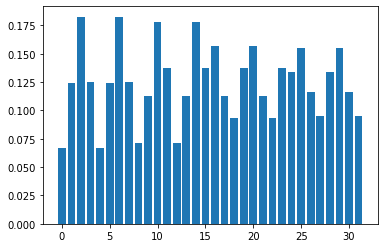

In [69]:
import matplotlib.pyplot as plt
x_axis =  [((FUND_ANGLE*180/np.pi)*i)%(360) for i in range(32)]
x_axis = np.arange(32)
plt.bar(x_axis, lpq_desq)

array([0.40216192, 0.63198059, 1.        , 0.77018133, 0.40216192,
       0.63198059, 1.        , 0.77018133])